# Exam #

By Nina Frandsen Jensen & Mathilde Maix

**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [ ]:
# Imports 
import math 
import scipy.optimize
import numpy as np
import pandas as pd
import sympy as sm
from scipy import optimize
from tabulate import tabulate
from scipy import optimize
from sympy import symbols, lambdify
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt
from types import SimpleNamespace


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [ ]:
import Question1
from Question1 import OptimalLCalculator
calculator = OptimalLCalculator()
G_values = [1.0, 2.0]
optimal_L = calculator.calculate_optimal_L(G_values)
optimal_L[0]

We have verified that $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$ where $\tilde{w} = (1-\tau)w$ is the optimal labor supply  choice for $G\in\left\{1.0 , 2.0\right\}$. 

Our expression $\frac{0.5(-\kappa\nu-\sqrt{\nu(4\alpha \tilde{w}^{2}+\kappa^{2}}\nu)}{\tilde{w}\nu}$ is not exactly identically expressed, but it is the same function, as seen from the factorization below: 

We  begin with the square root term inside the numerator. We can simplify this:

$$\sqrt{\nu(4\alpha \tilde{w}^{2}+\kappa^{2}}\nu) = \sqrt{\nu \cdot 4\alpha \tilde{w}^{2} + \nu \cdot \kappa^{2}}\nu$$

We can factor out the common factor of $\nu$:

$$\sqrt{4\alpha \tilde{w}^{2}\nu + \kappa^{2}\nu}\nu = \sqrt{\nu(\kappa^{2} + 4\alpha \tilde{w}^{2})}\nu$$

We substitute this simplified expression back into the original numerator, we have:

$$\frac{0.5(-\kappa\nu-\sqrt{\nu(\kappa^{2} + 4\alpha \tilde{w}^{2})}\nu)}{\tilde{w}\nu}$$

Now we factor out the common factor of $\nu$ from the numerator and cancel it out:

$$\frac{0.5(-\kappa\nu-\sqrt{\nu(\kappa^{2} + 4\alpha \tilde{w}^{2})}\nu)}{\tilde{w}\nu} = \frac{0.5\nu(-\kappa - \sqrt{\kappa^{2} + 4\alpha \tilde{w}^{2}})}{\tilde{w}\nu}= \frac{0.5(-\kappa - \sqrt{\kappa^{2} + 4\alpha \tilde{w}^{2}})}{\tilde{w}}$$

Finally, we simplify the expression by multiplying both the numerator and denominator by 2. Thus, the expression is factorized to:

$$L^*(\tilde{w})=\frac{-\kappa - \sqrt{\kappa^{2} + 4\alpha \tilde{w}^{2}}}{2\tilde{w}}$$


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

To illustrate how $L^{\star}(\tilde{w})$ depends on $w$ we plot the optimal labor supply choice in a graph. 

In [ ]:
kappa = 1.0
alpha = 0.5
nu = 1 / (2 * 16**2)
tau = 0.30
w = np.linspace(-10, 10, 100)  # Generate an array of w values

calculator = OptimalLCalculator()
calculator.plot_L_star(kappa, alpha, nu, tau, w)


The variable $\tilde{w}$ represents the real wage after-tax and is used in the worker utility maximization problem to account for the influence of taxation on the worker's decision-making. By incorporating $\tilde{w}$, the model considers the trade-off between work and leisure, which allows us to analysise how taxation influences labor supply choices.

The graph converges towards a point where further increases in the after-tax real wage has diminishing effects on the optimal labor supply choice. At this saturation point, workers may have satisfied their level of consumption and will prefer to use more time on leisure activities rather than labor.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [ ]:
calculator = OptimalLCalculator()

kappa = 1.0
alpha = 0.5
nu = 1 / (2 * 16**2)
w = 1.0

# Call plot_question4 method
calculator.plot_question3(kappa, alpha, nu, w)


Our graphs show $L$, $G$ and worker utility for a grid of $\tau$-values. 

- Plot of $L$: The graph of labour supply as a function of the tax rate illustrates the relationship betweeen optimal labor supply choice and the tax rate. The downward-sloping curve indicates that as the tax rate increases, the optimal labor supply exponentially decrease since individuals face a higher cost of working due to a larger share of their income going to taxes. Higher tax rates create financial disincentives for individuals to work more hours or participate actively in the labor market. Unfortunately, the individuals do not take the benefits of a higher tax rate into account when deciding their supply of labor.

- Plot of $G$: This graph represents the Laffer curve and thus represents the relationship between tax rates and government revenue. When tax rates are lower, the individuals are willing to work more as they get to keep a higher share of their income which leads to an increase in government revenue. However, when tax rates exceeds a certain point, it leads to diminishing returns and a decline in government revenue, as the individuals are disincentivized to work as much due to a lower disposable income. Thus, the graph suggests a trade-off between tax rate and government revenue, and it is seen that there is an optimal tax rate that maximizes government revenue.

- Plot of $V$: The graph shows the worker utility as a function of the tax rate. It is seen that the worker's utility increases until the tax rate rises to a certain point. Beyond this point, the utility decreases exponentially, since the marginal benefits of additional work decrease while their costs in terms of higher taxes and reduced net earnings continue to accumulate. The diminishing utility from additional effort exacerbates the negative impact of higher tax rates on overall worker satisfaction.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [ ]:
calculator = OptimalLCalculator()

kappa = 1.0  
alpha = 0.5  
nu = 1 / (2 * 16**2) 
w = 1.0

print("Optimal tau:", max_tau)
print("Maximum V:", max_V)

calculator.plot_question4(kappa, alpha, nu, w)


The graph above is identical to the graph of V in question 3, but with an added point at the maximum. The optimal tax rate is 0.3382 and the maximum worker utility is 1.59. Thus, the worker utility is increasing until the tax rate exceeds 33,8 pct. When the tax rate goes beyond this, the marginal benefits of additonal work will decrease.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [ ]:
def utility(L, w, tau, G, alpha, kappa, sigma, rho, nu, epsilon):
    C = kappa + (1 - tau) * w * L
    return ((((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho)-1)/(1- rho)) - nu * (L**(1+epsilon))/(1+epsilon)

def government(G, w, tau, alpha, kappa, sigma, rho, nu, epsilon):
    L_opt = optimize.fminbound(lambda L: -utility(L, w, tau, G, alpha, kappa, sigma, rho, nu, epsilon), 0, 24)
    return G - tau * w * L_opt

# Parameter values for Set 1
w =  1.0
tau = 0.33817131261325806  # Given tau value
alpha =  0.5
kappa =  1.0
nu = 1 / (2 * 16**2)

# Set 1: sigma = 1.001, rho = 1.001, epsilon = 1.0
sigma_1 = 1.001
rho_1 = 1.001
epsilon_1 = 1.0  # Set the value of epsilon for Set 1

# Set 2: sigma = 1.5, rho = 1.5, epsilon = 1.0
sigma_2 = 1.5
rho_2 = 1.5
epsilon_2 = 1.0  # Set the value of epsilon for Set 2

# Solve for G for Set 1
initial_guess = 1.0  # Initial guess for G in Set 1
args_1 = (w, tau, alpha, kappa, sigma_1, rho_1, nu, epsilon_1)
result_1 = optimize.root(government, initial_guess, args=args_1)
G_solution_1 = result_1.x[0]
L_opt_1 = optimize.fminbound(lambda L: -utility(L, w, tau, G_solution_1, alpha, kappa, sigma_1, rho_1, nu, epsilon_1), 0, 24)

# Solve for G for Set 2
initial_guess = 1.0  # Initial guess for G in Set 2
args_2 = (w, tau, alpha, kappa, sigma_2, rho_2, nu, epsilon_2)
result_2 = optimize.root(government, initial_guess, args=args_2)
G_solution_2 = result_2.x[0]
L_opt_2 = optimize.fminbound(lambda L: -utility(L, w, tau, G_solution_2, alpha, kappa, sigma_2, rho_2, nu, epsilon_2), 0, 24)

# Print results
print("Set 1:")
print("Optimal labor supply (L^*):", L_opt_1)
print("Corresponding value of G:", G_solution_1)
print()
print("Set 2:")
print("Optimal labor supply (L^*):", L_opt_2)
print("Corresponding value of G:", G_solution_2)

In set 1, the values of $\sigma$ and $\rho$ are very close to 1, implying that the worker's utility function exhibits nearly constant relative risk aversion and intertemporal elasticity of substitution. The optimal labor supply is 15.2492.The worker is willing to supply a higher amount of labor to maximize their utility. The optimal labor supply is determined by balancing the trade-off between the disutility of labor (second term in the utility function) and the utility gained from consumption (first term in the utility function).
The corresponding value of government consumption $G$ is 5.1569. Since the worker supplies a higher amount of labor in this set, the government receives more tax revenue, as labor income tax is proportional to the wage rate and labor supply. With higher tax revenue, the government can afford to provide a higher level of public goods or services, leading to a relatively higher level of government consumption.

In set 2, the values of $\sigma$ and $\rho$ are 1.5, indicating a higher level of risk aversion and intertemporal substitution compared to set 1. The optimal labor supply is 10.4323. The worker chooses to supply a lower amount of labor to reduce the disutility of work and allocate more time to leisure. The optimal labor supply is determined by the trade-off between the disutility of labor and the utility gained from consumption, considering the higher aversion to risk and intertemporal substitution.
The value of government consumption $G$ in set 2 is 3.5279. Since the worker supplies less labor in this set, the government receives lower tax revenue. Therefore, the government has less resources towards public goods or services, resulting in a relatively lower government consumption.

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
opt = SimpleNamespace()

def utility6(tau, L, sigma, rho, epsilon):
    kappa = 0.2
    w = 1.0
    alpha = 0.5
    nu = 0.1

    C = kappa + (1 - tau) * w * L
    inner = (alpha * C**((sigma - 1) / sigma) + (1 - alpha) * government_func(tau, L)**((sigma - 1) / sigma))**(sigma / (sigma - 1))
    return (((inner**(1 - rho)) - 1) / (1 - rho)) - nu * ((L**(1 + epsilon)) / (1 + epsilon))

def government_func(tau, L):
    w = 1.0
    return tau * w * L * ((1 - tau) * w)

def solve6(opt, sigma, rho, epsilon):
    objective_function = lambda x: -utility6(x[0], x[1], sigma, rho, epsilon)
    x0 = [0.5, 20.0]
    bounds = [(0.001, 1.0), (0.001, 24.0)]
    solution = optimize.minimize(objective_function, x0, method='Nelder-Mead', bounds=bounds)
    opt.tau = solution.x[0]
    opt.L = solution.x[1]
    return opt

# Set 1
sigma = 1.001
rho = 1.001
epsilon = 1.0

solve6(opt, sigma, rho, epsilon)
tau_opt1 = opt.tau
print("Set 1:")
print("Optimal tax rate:", tau_opt1)

# Set 2
sigma = 1.5
rho = 1.5
epsilon = 1.0

solve6(opt, sigma, rho, epsilon)
tau_opt2 = opt.tau
print("Set 2:")
print("Optimal tax rate:", tau_opt2)



In set 1, the optimal tax rate is 0.34348 (34 pct.), while in set 2, it is 0.29276 (29 pct.). Comparing the two sets, it is observed that in set 2, where the worker supplies less labor, the government decreases the tax rate. This adjustment is necessary to incentivize workers to supply more labor and maximize their utility.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [ ]:
from Question2 import hairdresser

# Create an instance of the hairdresser class
eta = 0.5
w = 1.0
kappa_values = [1.0, 2.0]

calculator = hairdresser(eta, w, kappa_values)

# Call the calculate_profits method
calculator.calculate_profits()

# Calculate and print the optimal ell expression
optimal_ell = calculator.calculate_optimal_ell()
print("Optimal ell expression:")
print(optimal_ell)


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
eta = 0.5
w = 1.0
kappa_values = [1.0, 2.0]

# Instantiate the hairdresser class
calculator = hairdresser(eta, w, kappa_values)

# Call the calculate_expected_value method
expected_value = calculator.calculate_expected_value()

# Print the expected value
print(f"Expected value of the salon (H): {expected_value}")

We have chosen K=1000. Higher values of K provide more precise estimations of the expected value, but also increases the loading time in visual code. 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
eta = 0.5
w = 1.0
kappa_values = [1.0, 2.0]

# Instantiate the hairdresser class
calculator = hairdresser(eta, w, kappa_values)

# Call the calculate_new_expected_value method
new_expected_value = calculator.calculate_new_expected_value()

# Print the new expected value
print(f"Expected value of the salon with $\delta$ = 0.05: {new_expected_value}")

The value of $H$ obtained with the updated policy is lower than the value obtained with the previous policy, it suggests that the new policy with $\Delta = 0.05$ does not improve profitability compared to the previous policy.



**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
eta = 0.5
w = 1.0
kappa_values = [1.0, 2.0]

calculator = hairdresser(eta, w, kappa_values)

# Call the optimize_delta method to optimize delta
calculator.optimize_delta()


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

   0: x^k = (-112.79,  443.60) -> x^k0 = (-112.79,  443.60)
   1: x^k = (  45.28,   34.00) -> x^k0 = (  45.28,   34.00)
   2: x^k = (-342.32,  255.08) -> x^k0 = (-342.32,  255.08)
   3: x^k = ( 201.93, -163.26) -> x^k0 = ( 201.93, -163.26)
   4: x^k = ( 243.43,  -90.44) -> x^k0 = ( 243.43,  -90.44)
   5: x^k = (-242.76,  160.79) -> x^k0 = (-242.76,  160.79)
   6: x^k = (-470.16, -186.39) -> x^k0 = (-470.16, -186.39)
   7: x^k = ( 157.03,  402.15) -> x^k0 = ( 157.03,  402.15)
   8: x^k = (-482.63,  541.13) -> x^k0 = (-482.63,  541.13)
   9: x^k = (-584.66,  -39.62) -> x^k0 = (-584.66,  -39.62)
 305: x^k = ( -67.99,   57.22) -> x^k0 = (  -0.40,   -1.37)
Converged at iteration: 306


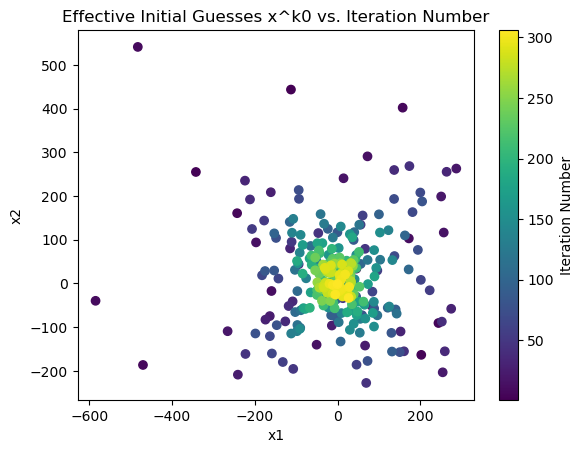

In [278]:
import Question3
from Question3 import RefinedGlobalOptimizer

optimizer_10 = RefinedGlobalOptimizer(warm_up_iterations=10)
optimizer_10.optimize()
optimizer_10.print_convergence_iteration()
optimizer_10.plot_effective_initial_guesses()

We can see that the optimizers converge all over the place, and end up in local minima instead of the global minimum. In the figure the initial guesses are illustrated by the darker colour. As the iterations increase, the optimizers converge closer to the global minimum of (0, 0), as illustrated by the lighter colour in the figure. 
With the tolerance set at $10^{-8}$, the model converges before the maximum number of iterations (K=1000).  


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

   0: x^k = (  98.17, -475.96) -> x^k0 = (  98.17, -475.96)
   1: x^k = (  45.29, -350.80) -> x^k0 = (  45.29, -350.80)
   2: x^k = ( -41.96,  -55.30) -> x^k0 = ( -41.96,  -55.30)
   3: x^k = ( 511.25,  565.21) -> x^k0 = ( 511.25,  565.21)
   4: x^k = ( 315.22, -476.72) -> x^k0 = ( 315.22, -476.72)
   5: x^k = ( 508.90,  189.07) -> x^k0 = ( 508.90,  189.07)
   6: x^k = (-528.33, -299.89) -> x^k0 = (-528.33, -299.89)
   7: x^k = (  -2.88,  315.93) -> x^k0 = (  -2.88,  315.93)
   8: x^k = (-299.22, -539.44) -> x^k0 = (-299.22, -539.44)
   9: x^k = (  61.66,  -54.24) -> x^k0 = (  61.66,  -54.24)
 418: x^k = (  59.65,   58.18) -> x^k0 = (  -0.63,   -1.94)
Converged at iteration: 419


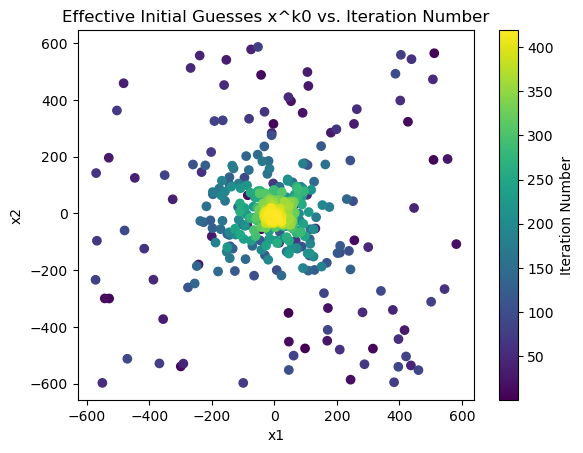

In [280]:
optimizer_100 = RefinedGlobalOptimizer(warm_up_iterations=100)
optimizer_100.optimize()
optimizer_100.print_convergence_iteration()
optimizer_100.plot_effective_initial_guesses()

Now the warm up iterations are set at 100 instead of 10 as in the previous question. We observe that the convergence is not faster, but there are more optimizers converging closer to (0, 0), as seen by the higher concentration of iterations around (0, 0) in the figure. 